In [2]:
import os
if "lofi_radio" not in os.getcwd().split(os.sep)[-1].lower():
    os.chdir("..")

import miditok

import torch 
import numpy as np
import pandas as pd
import glob 
from tqdm import tqdm
import mido
import symusic
from util.play_midi import play_midi

import sys
from pathlib import Path
import matplotlib.pyplot as plt


os.getcwd()

from huggingface_hub import notebook_login
import ipywidgets

In [3]:
# access_token = 
notebook_login()

In [6]:
midi_files = list(Path("data/").glob("**/*.mid"))

tokeniizer_config = miditok.TokenizerConfig(use_chords=True,)
tokenizer_remi = miditok.REMI(tokenizer_config=tokeniizer_config)
tokenizers = {"REMI":miditok.REMI(), "MIDI_LIKE":miditok.MIDILike(), "Octuple": miditok.Octuple(), "CP_Word": miditok.CPWord()}

for item in tokenizers:
    print(f"{item} has vocab size of : {len(tokenizers[item])}, special tokens : {tokenizers[item].special_tokens}")

tokenizer_remi.save_pretrained(save_directory="model/tokenizer_trained", push_to_hub=True, )

REMI has vocab size of : 282, special tokens : ['PAD_None', 'BOS_None', 'EOS_None', 'MASK_None']
MIDI_LIKE has vocab size of : 398, special tokens : ['PAD_None', 'BOS_None', 'EOS_None', 'MASK_None']
Octuple has vocab size of : 357, special tokens : ['PAD_None', 'BOS_None', 'EOS_None', 'MASK_None']
CP_Word has vocab size of : 304, special tokens : ['PAD_None', 'BOS_None', 'EOS_None', 'MASK_None']


CommitInfo(commit_url='https://huggingface.co/theglassofwater/tokenizer_trained/commit/9970829a851e4b38dd13f3ff44c512508da8c16d', commit_message='Push model using huggingface_hub.', commit_description='', oid='9970829a851e4b38dd13f3ff44c512508da8c16d', pr_url=None, pr_revision=None, pr_num=None)

In [10]:
song2_file = midi_files[1]
song2_file

WindowsPath('data/jazz_midi/2ndMovementOfSinisterFootwear.mid')

[('REMI', 282 tokens with ('I', 'T') io format, without BPE), ('MIDI_LIKE', 398 tokens with ('I', 'T') io format, without BPE), ('Octuple', [153, 36, 68, 36, 396] tokens with ('I', 'T', 'C') io format(multi-voc), without BPE), ('CP_Word', [6, 38, 154, 37, 69] tokens with ('I', 'T', 'C') io format(multi-voc), without BPE)]


Text(0.5, 0, 'Tokenizer')

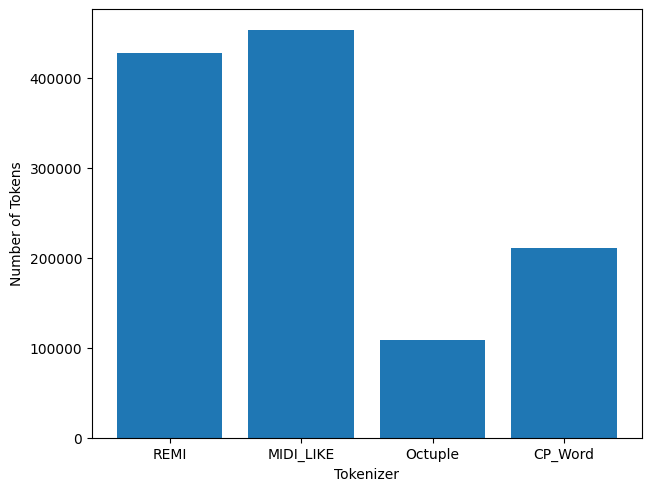

In [86]:
song1_file = midi_files[-2] # short, single tracked song
song2_file = midi_files[1] # long, multitrack song


def tokenizer_info(song_file, tokenizer):
    tracks = tokenizer(song_file)
    tokens_per_track = [len(track) for track in tracks]
    num_of_tokens = sum(tokens_per_track)
    # print(num_of_tokens, len(tracks))
    return tracks, num_of_tokens

tokens_per_tokenizer = [0]*len(tokenizers)
for file in midi_files[25:50]:
    for i,name in enumerate(tokenizers.keys()):
        tracks, num_of_tokens = tokenizer_info(file, tokenizers[name])
        tokens_per_tokenizer[i] += num_of_tokens




print([i for i in list(tokenizers.items())])

fig, ax = plt.subplots(layout = "constrained")
# ax.bar(tokenizers.keys(), [tokenizer_info(song2_file, tokenizers[name])[1] for name in tokenizers.keys()])
ax.bar(tokenizers.keys(), tokens_per_tokenizer)
ax.set_ylabel("Number of Tokens")
ax.set_xlabel("Tokenizer")

In [10]:
file = midi_files[-2]
print(file)

song = symusic.Score(file)

tokenized_songs = [i[1](file) for i in tokenizers.items()]
tokenized_songss = tokenizer_remi(file)
len(tokenized_songs)
play_midi(file)

data\test\3.mid


In [9]:
for i in tokenized_songs:
    print(len(i[0]))
print(len(tokenized_songss[0]))


97
99
30
37
97


In [18]:
print(tokenized_songs[2][0])

TokSequence(tokens=[['Pitch_54', 'Velocity_63', 'Duration_0.3.8', 'Position_0', 'Bar_0'], ['Pitch_61', 'Velocity_63', 'Duration_0.3.8', 'Position_0', 'Bar_0'], ['Pitch_64', 'Velocity_63', 'Duration_0.3.8', 'Position_0', 'Bar_0'], ['Pitch_69', 'Velocity_63', 'Duration_0.3.8', 'Position_0', 'Bar_0'], ['Pitch_50', 'Velocity_63', 'Duration_0.3.8', 'Position_16', 'Bar_0'], ['Pitch_57', 'Velocity_63', 'Duration_0.3.8', 'Position_16', 'Bar_0'], ['Pitch_62', 'Velocity_63', 'Duration_0.3.8', 'Position_16', 'Bar_0'], ['Pitch_66', 'Velocity_63', 'Duration_0.3.8', 'Position_16', 'Bar_0'], ['Pitch_69', 'Velocity_63', 'Duration_0.3.8', 'Position_16', 'Bar_0'], ['Pitch_73', 'Velocity_63', 'Duration_0.3.8', 'Position_16', 'Bar_0'], ['Pitch_76', 'Velocity_63', 'Duration_0.3.8', 'Position_16', 'Bar_0'], ['Pitch_47', 'Velocity_63', 'Duration_0.3.8', 'Position_0', 'Bar_1'], ['Pitch_59', 'Velocity_63', 'Duration_0.3.8', 'Position_0', 'Bar_1'], ['Pitch_62', 'Velocity_63', 'Duration_0.3.8', 'Position_0', 'Ba